In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [328]:
data=pd.read_csv("product_sales_dataset_final.csv")
df=pd.DataFrame(data)
df.head()

,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit
0,1,08-23-23,Bianca Brown,Jackson,Mississippi,South,United States,Accessories,Small Electronics,Phone Case,3,201.01,603.03,221.49
1,2,12-20-24,Jared Edwards,Grand Rapids,Michigan,Centre,United States,Accessories,Small Electronics,Charging Cable,4,74.30,297.20,97.09
2,3,01-29-24,Susan Valdez,Minneapolis,Minnesota,Centre,United States,Clothing & Apparel,Sportswear,Nike Air Force 1,1,68.19,68.19,25.47
3,4,11-29-24,Tina Williams,Tallahassee,Florida,South,United States,Clothing & Apparel,Sportswear,Adidas Tracksuit,3,209.64,628.92,231.38
4,5,09-21-23,Catherine Gordon,Baltimore,Maryland,East,United States,Accessories,Bags,Backpack,1,216.63,216.63,42.46


In [329]:
df.shape


(200000, 14)

In [330]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region',
       'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity',
       ' Unit_Price ', ' Revenue ', ' Profit '],
      dtype='object')

In [331]:
df.isnull().sum()

Order_ID         0
Order_Date       0
Customer_Name    0
City             0
State            0
Region           0
Country          0
Category         0
Sub_Category     0
Product_Name     0
Quantity         0
 Unit_Price      0
 Revenue         0
 Profit          0
dtype: int64

In [332]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 200000, dtype: bool

In [333]:
df.describe()

,Order_ID,Quantity,Unit_Price,Revenue,Profit
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,1.854000,382.855615,712.038725,157.743041
std,57735.171256,1.100536,276.870235,742.471556,155.689581
min,1.000000,1.000000,17.030000,17.030000,3.920000
25%,50000.750000,1.000000,162.760000,229.187500,59.210000
50%,100000.500000,1.000000,303.545000,464.880000,109.530000
75%,150000.250000,2.000000,562.252500,881.302500,199.402500
max,200000.000000,11.000000,1432.000000,9014.250000,2763.720000


In [334]:
date_col=pd.DatetimeIndex(df["Order_Date"])
df["Year"]=date_col.year
df["Month"]=date_col.month
df["Date"]=date_col.day
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region',
       'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity',
       ' Unit_Price ', ' Revenue ', ' Profit ', 'Year', 'Month', 'Date'],
      dtype='object')

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       200000 non-null  int64  
 1   Order_Date     200000 non-null  object 
 2   Customer_Name  200000 non-null  object 
 3   City           200000 non-null  object 
 4   State          200000 non-null  object 
 5   Region         200000 non-null  object 
 6   Country        200000 non-null  object 
 7   Category       200000 non-null  object 
 8   Sub_Category   200000 non-null  object 
 9   Product_Name   200000 non-null  object 
 10  Quantity       200000 non-null  int64  
 11   Unit_Price    200000 non-null  float64
 12   Revenue       200000 non-null  float64
 13   Profit        200000 non-null  float64
 14  Year           200000 non-null  int32  
 15  Month          200000 non-null  int32  
 16  Date           200000 non-null  int32  
dtypes: float64(3), int32(3), int6

In [336]:
df.columns=df.columns.str.strip()
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region',
       'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity',
       'Unit_Price', 'Revenue', 'Profit', 'Year', 'Month', 'Date'],
      dtype='object')

In [337]:
dff=df.copy()

# label encoding

In [338]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dff["Order_Date"]=le.fit_transform(dff["Order_Date"])
dff["Customer_Name"]=le.fit_transform(dff["Customer_Name"])
dff["City"]=le.fit_transform(dff["City"])
dff["State"]=le.fit_transform(dff["State"])
dff["Region"]=le.fit_transform(dff["Region"])
dff["Country"]=le.fit_transform(dff["Country"])
dff["Category"]=le.fit_transform(dff["Category"])
dff["Sub_Category"]=le.fit_transform(dff["Sub_Category"])
dff["Product_Name"]=le.fit_transform(dff["Product_Name"])
dff["Revenue"]=le.fit_transform(dff["Revenue"])
dff["Profit"]=le.fit_transform(dff["Profit"])
dff["Unit_Price"]=le.fit_transform(dff["Unit_Price"])
dff


,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit,Year,Month,Date
0,1,469,12217,42,21,2,0,0,10,31,3,17232,47429,21446,2023,8,23
1,2,708,48901,35,19,0,0,0,10,9,4,4793,24046,9163,2024,12,20
2,3,57,108560,59,20,0,0,1,12,27,1,4202,3253,2001,2024,1,29
3,4,666,113475,98,7,2,0,1,12,0,3,18076,49179,22370,2024,11,29
4,5,527,19548,6,17,1,0,0,0,4,1,18766,16924,3700,2023,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,453,118987,12,18,1,0,3,13,36,4,22466,72116,30995,2023,8,15
199996,199997,579,103712,10,30,0,0,0,10,9,1,20771,18813,4107,2023,10,17
199997,199998,673,63667,90,28,3,0,0,16,37,2,7977,16648,9711,2023,12,3
199998,199999,683,72971,68,29,1,0,1,18,47,2,31529,54351,27436,2023,12,8


In [339]:
dff.head()

,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit,Year,Month,Date
0,1,469,12217,42,21,2,0,0,10,31,3,17232,47429,21446,2023,8,23
1,2,708,48901,35,19,0,0,0,10,9,4,4793,24046,9163,2024,12,20
2,3,57,108560,59,20,0,0,1,12,27,1,4202,3253,2001,2024,1,29
3,4,666,113475,98,7,2,0,1,12,0,3,18076,49179,22370,2024,11,29
4,5,527,19548,6,17,1,0,0,0,4,1,18766,16924,3700,2023,9,21


# KPI(TOTAL SALES,PROFIT,ORDERS AVERAGE ORDER VALUES)

# 1) TOTAL PROFIT AND REVENUE(TOTAL SALES)

In [340]:
total_profit=dff["Profit"].sum()
print("total profit :",total_profit)
total_revenue=dff["Revenue"].sum()
print("total revenue :",total_revenue)

total profit : 2762939514
total revenue : 8681717283


# totalsales calculation for proof(revenue = total sales)

In [341]:
total_sales=dff["Unit_Price"]*dff["Quantity"]
print("total_sales :",total_sales)
print("total sales value is equal to tatal revenue :",total_sales.sum())

total_sales : 0         51696
1         19172
2          4202
3         54228
4         18766
          ...  
199995    89864
199996    20771
199997    15954
199998    63058
199999    18771
Length: 200000, dtype: int64
total sales value is equal to tatal revenue : 11787411735


# 2) TOTAL ORDERS

In [342]:
total_order=dff["Order_ID"].nunique()
print("total_order :",total_order)

total_order : 200000


# 3) AVERAGE ORDER VALUE(AOR=TOTAL REVENUE/NUMBER OF UNIQUE ORDER)

In [343]:
average_order_value=total_revenue/total_order
print("average order value :",average_order_value)

average order value : 43408.586415


# SALES TREND ANALYSIS (MONTHLY,REGIONWISE,CATEGORYWISE)

# 1) yearly sales

In [344]:
yearly_sales=dff.groupby("Year")["Revenue"].sum()
print("yearly sales :",yearly_sales)

yearly sales : Year
2023    4319427110
2024    4362290173
Name: Revenue, dtype: int64


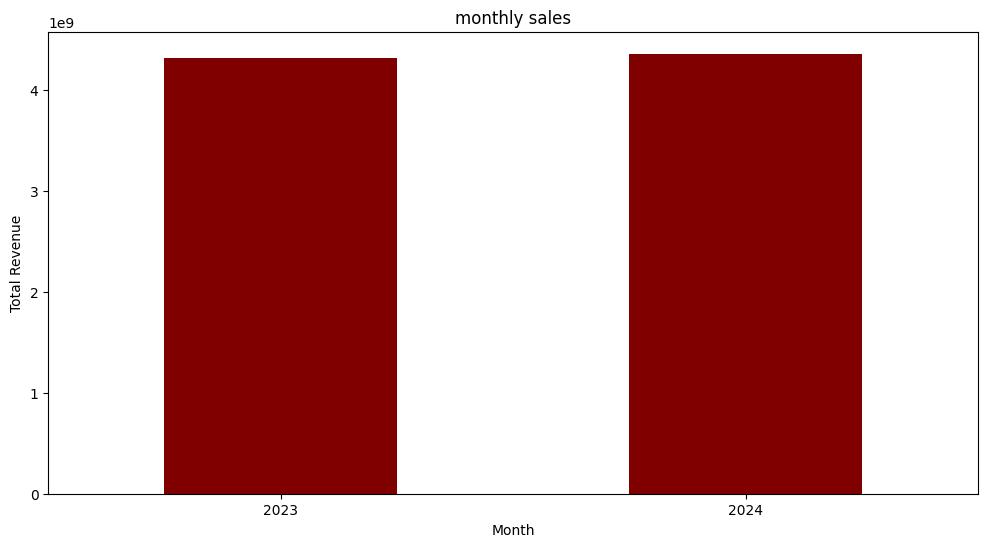

In [345]:
plt.figure(figsize=(12,6))
yearly_sales.plot(kind="bar",color="maroon")
plt.title("monthly sales")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

#  2) monthly trend

In [346]:
monthly_sales=dff.groupby("Month")["Revenue"].sum()
print("monthly sales trend :",monthly_sales)

monthly sales trend : Month
1      531230142
2      345223983
3      485294349
4      525151330
5      586718124
6      575370118
7      543064212
8      538515476
9      575343499
10    1063919774
11    1665528302
12    1246357974
Name: Revenue, dtype: int64


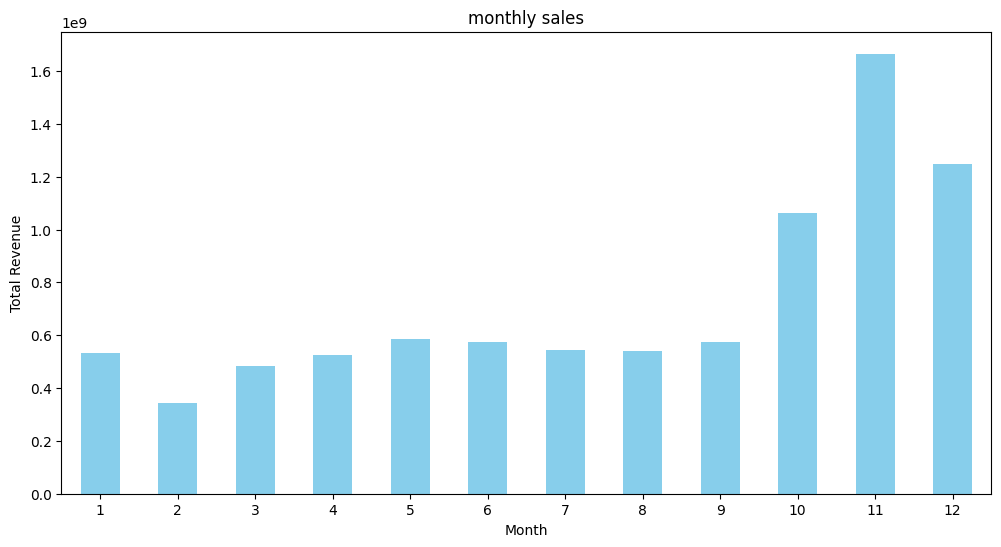

In [347]:
plt.figure(figsize=(12,6))
monthly_sales.plot(kind="bar",color="skyblue")
plt.title("monthly sales")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

# monthly sales for every year

In [348]:
monthly_sales_by_year=dff.groupby(["Year","Month"])["Revenue"].sum().unstack(level=0)
print("monthly sales by year :",monthly_sales_by_year)

monthly sales by year : Year        2023       2024
Month                      
1      266428386  264801756
2      168796013  176427970
3      236137822  249156527
4      265214372  259936958
5      293075958  293642166
6      287507624  287862494
7      274370294  268693918
8      267146678  271368798
9      282371456  292972043
10     532340725  531579049
11     817000863  848527439
12     629036919  617321055


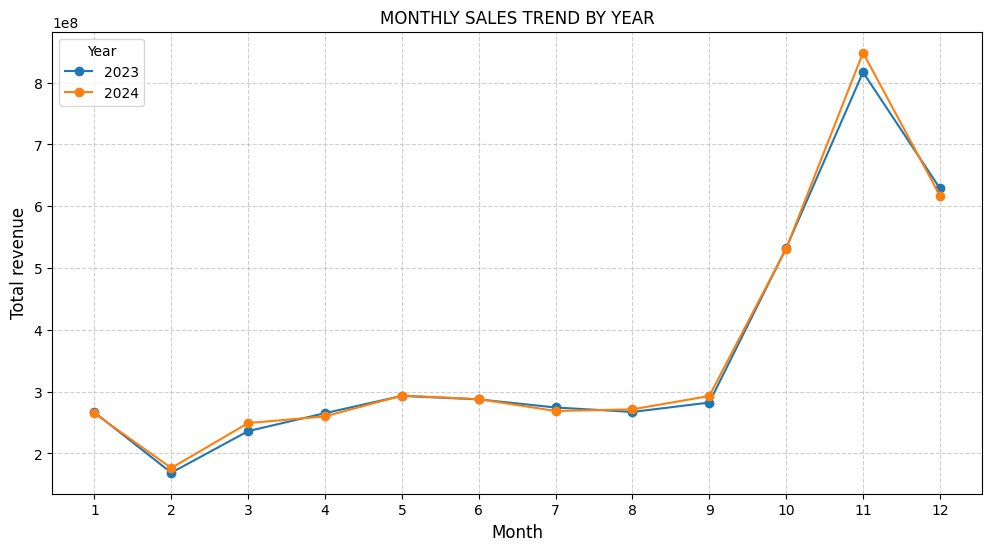

In [349]:
plt.figure(figsize=(12,6))
monthly_sales_by_year.plot(kind='line',marker="o",ax=plt.gca())
plt.title("MONTHLY SALES TREND BY YEAR")
plt.xlabel("Month",fontsize=12)
plt.ylabel("Total revenue",fontsize=12)
plt.xticks(monthly_sales_by_year.index)
plt.legend(title="Year")
plt.grid(True,linestyle="--",alpha=0.6)
plt.show()

# 3) categorywise sales

In [350]:
categorywise_sales=df.groupby("Category")["Revenue"].sum()
print("categorywise sales :",categorywise_sales)

categorywise sales : Category
Accessories           10113254.61
Clothing & Apparel    27134365.30
Electronics           57485698.06
Home & Furniture      47674426.96
Name: Revenue, dtype: float64


In [351]:
top_sales_by_category=categorywise_sales.sort_values(ascending=False)
print("top_sales_by_category :",top_sales_by_category)

top_sales_by_category : Category
Electronics           57485698.06
Home & Furniture      47674426.96
Clothing & Apparel    27134365.30
Accessories           10113254.61
Name: Revenue, dtype: float64


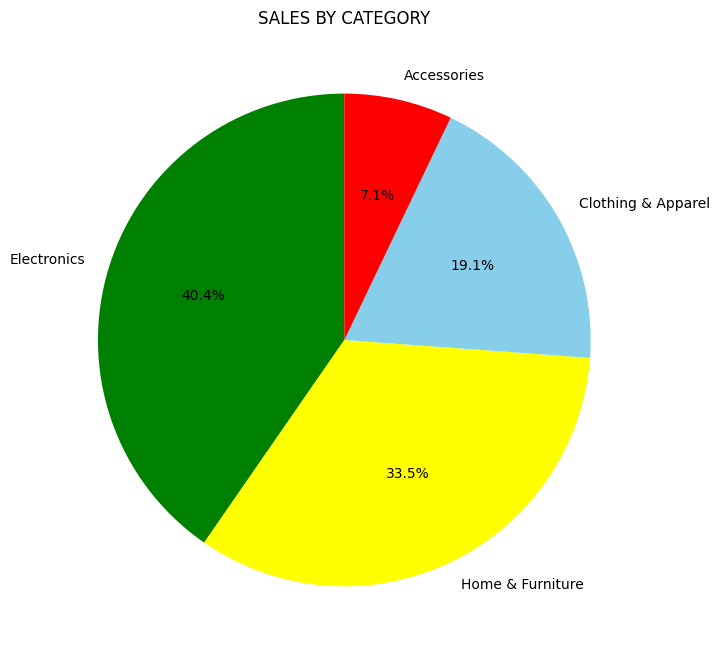

In [355]:
colors=["green","yellow","skyblue","red"]
plt.figure(figsize=(8,8))
top_sales_by_category.plot(kind='pie',autopct="%1.1f%%",startangle=90,colors=colors)
plt.title("SALES BY CATEGORY")
plt.ylabel(" ")
plt.show()


In [356]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region',
       'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity',
       'Unit_Price', 'Revenue', 'Profit', 'Year', 'Month', 'Date'],
      dtype='object')

# 4) subcategory sales

In [357]:
subcategorywise_sales=df.groupby("Sub_Category")["Revenue"].sum()
print("subcategorywise sales :",subcategorywise_sales)

subcategorywise sales : Sub_Category
Bags                     3186076.31
Bedding                 13042783.30
Footwear                 5421641.72
Furniture                9697778.92
Home Appliances          8638544.88
Home Decor               8070216.82
Kids Wear                4931503.91
Kitchenware              9117341.17
Laptops                 12358319.81
Men's Wear               5640236.12
Small Electronics        3746552.39
Smartphones             10904335.31
Sportswear               5813495.93
Storage                  7746306.75
TVs & Audio              7994159.82
Tablets                  8373830.76
Wearable Accessories     3180625.91
Wearables                9216507.48
Women's Wear             5327487.62
Name: Revenue, dtype: float64


In [360]:
top_sales_by_subcategorywise=subcategorywise_sales.sort_values(ascending=True)
print("top sales by category :",top_sales_by_subcategorywise)

top sales by category : Sub_Category
Wearable Accessories     3180625.91
Bags                     3186076.31
Small Electronics        3746552.39
Kids Wear                4931503.91
Women's Wear             5327487.62
Footwear                 5421641.72
Men's Wear               5640236.12
Sportswear               5813495.93
Storage                  7746306.75
TVs & Audio              7994159.82
Home Decor               8070216.82
Tablets                  8373830.76
Home Appliances          8638544.88
Kitchenware              9117341.17
Wearables                9216507.48
Furniture                9697778.92
Smartphones             10904335.31
Laptops                 12358319.81
Bedding                 13042783.30
Name: Revenue, dtype: float64


In [374]:
top_5_subcategory_wise_sales=top_sales_by_subcategorywise.nlargest(5)
print("top 5 subcategory wise sales :",top_5_subcategory_wise_sales)


top 5 subcategory wise sales : Sub_Category
Bedding        13042783.30
Laptops        12358319.81
Smartphones    10904335.31
Furniture       9697778.92
Wearables       9216507.48
Name: Revenue, dtype: float64


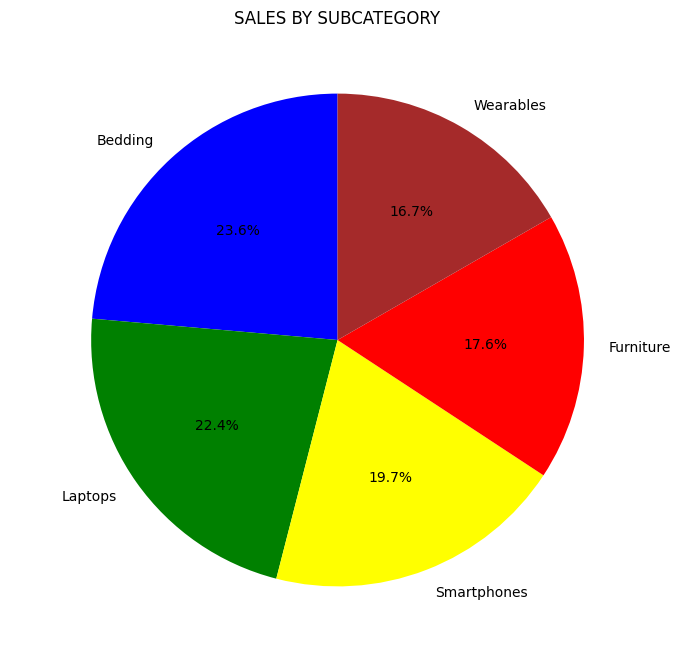

In [375]:
plt.figure(figsize=(8,8))
colors=["blue","green","yellow","red","brown"]
top_5_subcategory_wise_sales.plot(kind="pie",colors=colors,autopct="%1.1f%%",startangle=90)
plt.title("SALES BY SUBCATEGORY")
plt.ylabel(" ")
plt.show()

# 5) regionwise sales

In [362]:
statewise_sales=df.groupby("State")["Revenue"].sum()
print("statewise sales :",statewise_sales)

statewise sales : State
Alabama           3562668.26
Arizona           6668187.20
Arkansas          2115237.08
California        6766728.65
Colorado          2705748.41
Connecticut       4515748.44
Delaware          4515199.69
Florida           3518194.41
Georgia           1396781.49
Idaho             1342947.76
Illinois          4328321.10
Indiana           2643005.71
Iowa              2707731.18
Kansas            2884408.31
Kentucky          1457033.13
Louisiana         1390253.95
Maine             2135780.35
Maryland          4414915.03
Massachusetts     4471454.84
Michigan          2752787.34
Minnesota         2685077.42
Mississippi       1423797.18
Missouri          2753727.38
Montana           2733587.20
Nebraska          2753537.99
Nevada            2771594.23
New Hampshire     4489012.87
New Jersey        4552067.75
New Mexico        2551558.02
New York          4541307.27
North Dakota      2876829.62
Ohio              4241205.66
Oklahoma          1524144.73
Oregon            2

In [365]:
top_sales_by_statewise=statewise_sales.sort_values(ascending=False)
print("top sales by state :",top_sales_by_statewise)

top sales by state : State
California        6766728.65
Arizona           6668187.20
New Jersey        4552067.75
Vermont           4550459.19
New York          4541307.27
Connecticut       4515748.44
Delaware          4515199.69
Pennsylvania      4495637.28
New Hampshire     4489012.87
Massachusetts     4471454.84
Maryland          4414915.03
Illinois          4328321.10
Ohio              4241205.66
Alabama           3562668.26
Florida           3518194.41
Texas             3023838.36
Kansas            2884408.31
North Dakota      2876829.62
Nevada            2771594.23
Missouri          2753727.38
Nebraska          2753537.99
Michigan          2752787.34
Utah              2740180.36
South Dakota      2734288.49
Montana           2733587.20
Wisconsin         2720974.14
Iowa              2707731.18
Colorado          2705748.41
Minnesota         2685077.42
Wyoming           2673429.27
Washington        2648003.26
Indiana           2643005.71
Oregon            2640877.37
New Mexico      

In [366]:
top_10_sales_by_statewise=top_sales_by_statewise.nlargest(10)
print("top ten sales by statewise :",top_10_sales_by_statewise)

top ten sales by statewise : State
California       6766728.65
Arizona          6668187.20
New Jersey       4552067.75
Vermont          4550459.19
New York         4541307.27
Connecticut      4515748.44
Delaware         4515199.69
Pennsylvania     4495637.28
New Hampshire    4489012.87
Massachusetts    4471454.84
Name: Revenue, dtype: float64


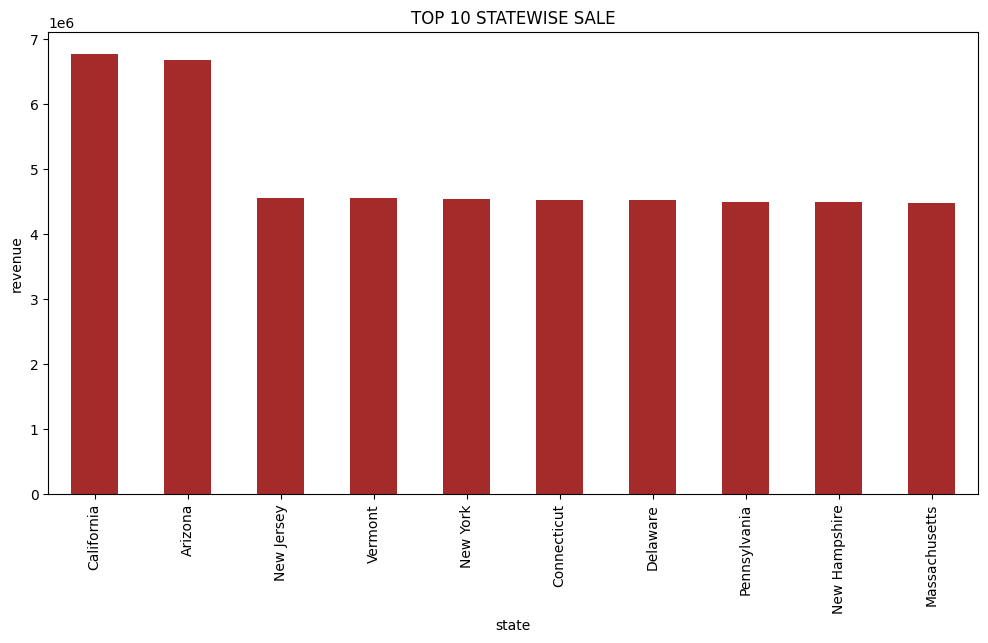

In [368]:
plt.figure(figsize=(12,6))
top_10_sales_by_statewise.plot(kind="bar",color="brown")
plt.title("TOP 10 STATEWISE SALE")
plt.xlabel("state")
plt.ylabel("revenue")
plt.show()

# 6) citywise sales

In [370]:
citywise_sales=df.groupby("City")["Revenue"].sum()
print("statewise sales :",citywise_sales)

statewise sales : City
Albuquerque       1304812.80
Annapolis         2224803.55
Atlanta            720162.14
Augusta           2135780.35
Aurora            1385145.27
                     ...    
Tuscaloosa         672175.06
Virginia Beach     653507.46
Wichita           1467304.30
Wilmington        2311588.97
Worcester         2197189.98
Name: Revenue, Length: 108, dtype: float64


In [371]:
top_sales_by_citywise=citywise_sales.sort_values(ascending=False)
print("top sales by state :",top_sales_by_citywise)

top sales by state : City
Burlington        2367578.63
Manchester        2316261.28
Rochester         2312165.68
Wilmington        2311588.97
Providence        2298465.51
                     ...    
Memphis            681320.68
Savannah           676619.35
Tuscaloosa         672175.06
Baton Rouge        667434.59
Virginia Beach     653507.46
Name: Revenue, Length: 108, dtype: float64


In [372]:
top_10_sales_by_citywise=top_sales_by_citywise.nlargest(10)
print("top ten sales by statewise :",top_10_sales_by_citywise)

top ten sales by statewise : City
Burlington      2367578.63
Manchester      2316261.28
Rochester       2312165.68
Wilmington      2311588.97
Providence      2298465.51
Jersey City     2290243.36
Boston          2274264.86
Philadelphia    2262453.14
Newark          2261824.39
New Haven       2261371.05
Name: Revenue, dtype: float64


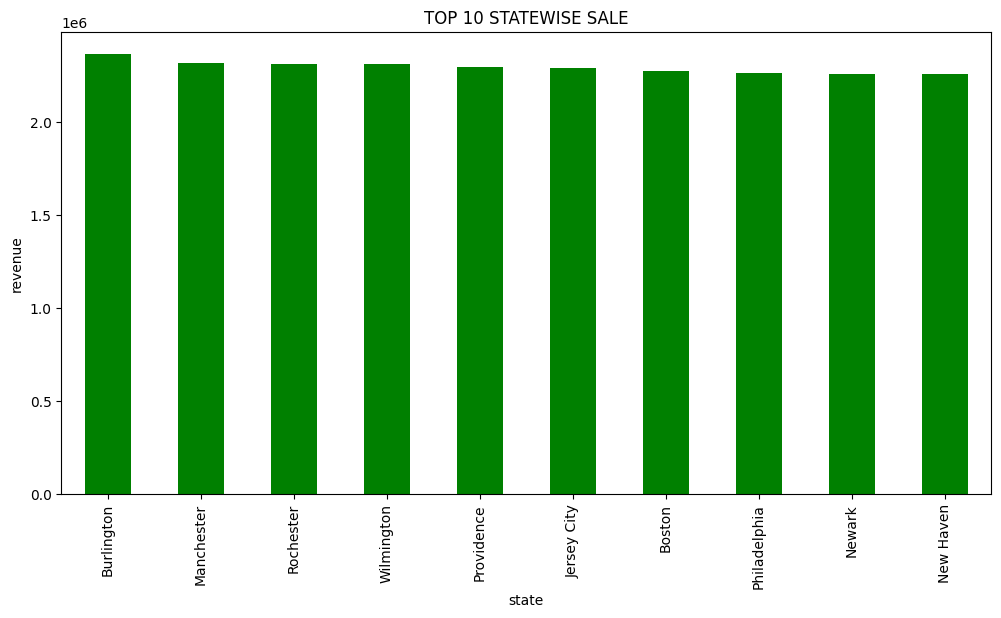

In [376]:
plt.figure(figsize=(12,6))
top_10_sales_by_citywise.plot(kind="bar",color="green")
plt.title("TOP 10 STATEWISE SALE")
plt.xlabel("state")
plt.ylabel("revenue")
plt.show()

# 7) sales by region

In [377]:
regionwise_sales=df.groupby("Region")["Revenue"].sum()
print("Regionwise sales :",regionwise_sales)

Regionwise sales : Region
Centre    36081894.34
East      44980048.22
South     25102960.64
West      36242841.73
Name: Revenue, dtype: float64


In [381]:
top_sales_by_regionwise=regionwise_sales.sort_values(ascending=False)
print("top sales by region :",top_sales_by_regionwise)

top sales by region : Region
East      44980048.22
West      36242841.73
Centre    36081894.34
South     25102960.64
Name: Revenue, dtype: float64


In [384]:
top_10_sales_by_regionwise=top_sales_by_regionwise.nlargest(4)
print("top ten sales by regionwise :",top_10_sales_by_regionwise)

top ten sales by regionwise : Region
East      44980048.22
West      36242841.73
Centre    36081894.34
South     25102960.64
Name: Revenue, dtype: float64


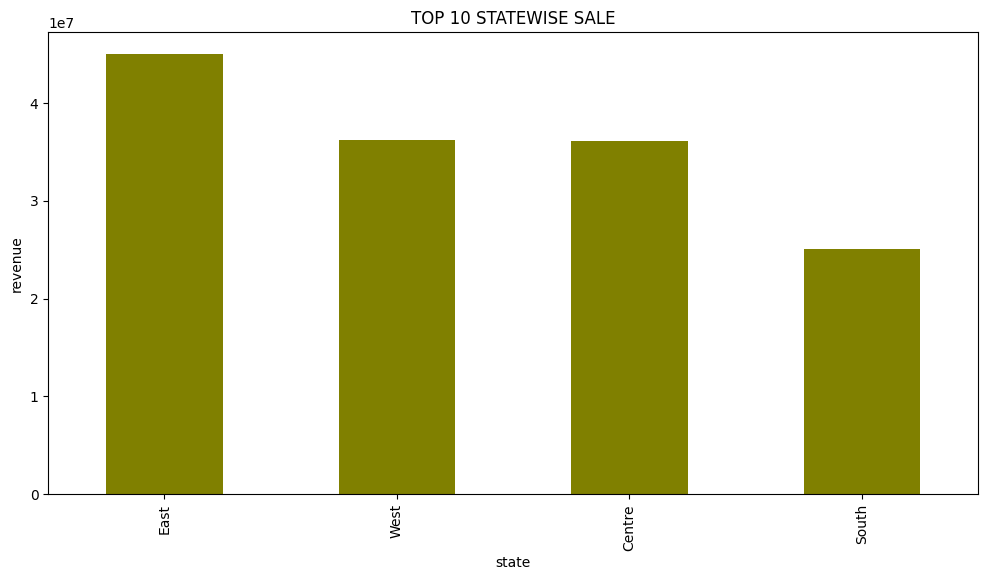

In [383]:
plt.figure(figsize=(12,6))
top_10_sales_by_regionwise.plot(kind="bar",color="olive")
plt.title("TOP 10 STATEWISE SALE")
plt.xlabel("state")
plt.ylabel("revenue")
plt.show()

# CUSTOMER INSIGHTS

In [385]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region',
       'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity',
       'Unit_Price', 'Revenue', 'Profit', 'Year', 'Month', 'Date'],
      dtype='object')

# 1) top buyers

In [386]:
customers=df.groupby("Customer_Name")["Revenue"].sum()
print("customer name :",customers)

customer name : Customer_Name
Aaron Abbott         67.13
Aaron Alexander    3190.08
Aaron Ali          3730.24
Aaron Allen        2415.12
Aaron Alvarez       488.51
                    ...   
Zoe Russell         171.98
Zoe Snyder          506.28
Zoe Stephens        556.65
Zoe Tucker          846.32
Zoe Whitaker       2715.45
Name: Revenue, Length: 120230, dtype: float64


In [389]:
top_customers=customers.sort_values(ascending=False)
print("top customers :",top_customers)

top customers : Customer_Name
Michael Smith        76415.21
Michael Williams     59135.73
Michael Johnson      56293.22
Christopher Smith    51312.20
David Smith          48449.39
                       ...   
Julia Cortez            18.96
Mr. Evan Galvan         18.82
Noah Pham               18.65
Gary Roberts            18.23
Jody Wheeler            17.59
Name: Revenue, Length: 120230, dtype: float64


In [391]:
top_10_customers=top_customers.nlargest(10)
print("top 10 customers :",top_10_customers)

top 10 customers : Customer_Name
Michael Smith        76415.21
Michael Williams     59135.73
Michael Johnson      56293.22
Christopher Smith    51312.20
David Smith          48449.39
Robert Smith         46686.90
Michael Jones        46096.91
Jennifer Smith       43157.92
James Smith          40500.86
Jennifer Johnson     37044.15
Name: Revenue, dtype: float64


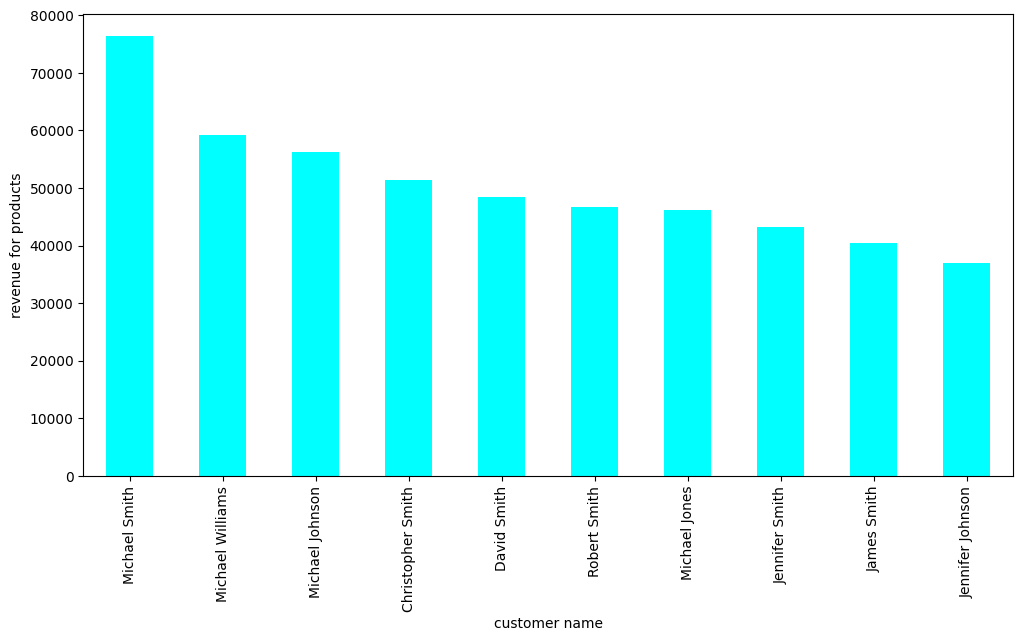

In [392]:
plt.figure(figsize=(12,6))
top_10_customers.plot(kind="bar",color="cyan")
plt.xlabel("customer name")
plt.ylabel("revenue for products")
plt.show()

In [393]:
df.columns

Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region',
       'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity',
       'Unit_Price', 'Revenue', 'Profit', 'Year', 'Month', 'Date'],
      dtype='object')

# 2) frequent customer finding

In [394]:
frequent_customer=df["Customer_Name"].value_counts()
print("frequent customer :",frequent_customer)

frequent customer : Customer_Name
Michael Smith              102
Michael Johnson             77
Michael Williams            70
David Smith                 69
Christopher Smith           69
                          ... 
Victor Bolton                1
Mrs. Cynthia Cunningham      1
Andrea Little                1
Shelby Webb                  1
April Arnold                 1
Name: count, Length: 120230, dtype: int64


In [395]:
top_10_frequent_customer=frequent_customer.sort_values(ascending=True).nlargest(10)
print("top 10 frequent customer :",top_10_frequent_customer)

top 10 frequent customer : Customer_Name
Michael Smith        102
Michael Johnson       77
Michael Williams      70
Christopher Smith     69
David Smith           69
Jennifer Smith        62
Robert Smith          62
James Smith           55
Michael Jones         53
John Smith            51
Name: count, dtype: int64


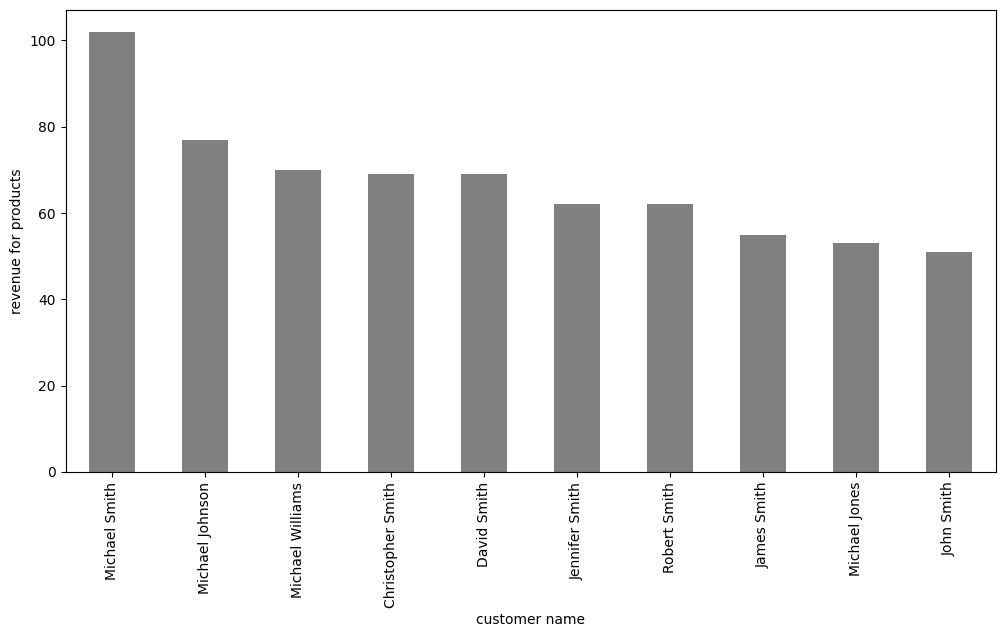

In [396]:
plt.figure(figsize=(12,6))
top_10_frequent_customer.plot(kind="bar",color="gray")
plt.xlabel("customer name")
plt.ylabel("revenue for products")
plt.show()

# 3) High value orders

# top 10 orders by revenue

In [406]:
top_10_orders_by_revenue=df.nlargest(10,"Revenue")
print("high value orders:",top_10_orders_by_revenue)

high value orders:         Order_ID Order_Date      Customer_Name            City          State  \
153648    153649   11-05-24       Hannah Cooke     Springfield       Illinois   
57665      57666   11-27-23       Dalton Oneal  Salt Lake City           Utah   
102263    102264   12-30-24        Aaron Perry     Los Angeles     California   
199992    199993   07-14-24   Dr. Jordan Allen           Miami        Florida   
125861    125862   11-27-24      Taylor Carter        Billings        Montana   
177217    177218   04-30-24  Christopher Lopez       New Haven    Connecticut   
19838      19839   11-03-24      Robert Barnes      Birmingham        Alabama   
193658    193659   08-27-24       Nicole Lopez    Jacksonville        Florida   
126456    126457   11-27-23     Thomas Jimenez          Boston  Massachusetts   
163261    163262   02-28-24      Jessica Evans    Indianapolis        Indiana   

        Region        Country          Category Sub_Category  \
153648  Centre  United St

<Figure size 1200x600 with 0 Axes>

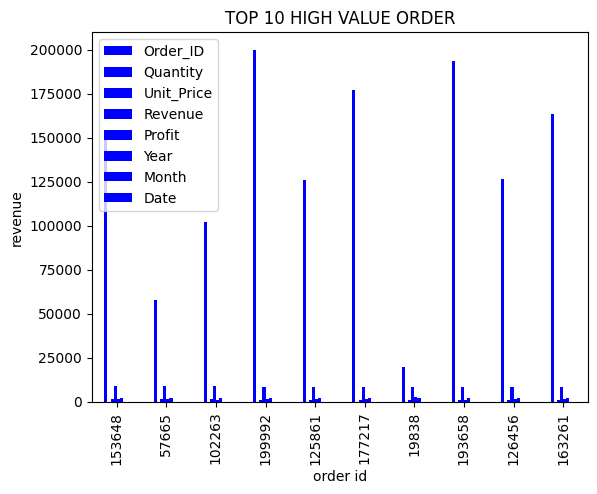

In [409]:
plt.figure(figsize=(12,6))
top_10_orders_by_revenue.plot(kind="bar",color="blue")
plt.title("TOP 10 HIGH VALUE ORDER")
plt.xlabel("order id")
plt.ylabel("revenue")
plt.show()

# top 10 orders by profit

In [410]:
top_10_orders_by_profit=df.nlargest(10,"Profit")
print("high value orders:",top_10_orders_by_profit)

high value orders:         Order_ID Order_Date   Customer_Name          City         State  \
19838      19839   11-03-24   Robert Barnes    Birmingham       Alabama   
15637      15638   02-29-24  Mercedes Arias     St. Louis      Missouri   
182987    182988   04-09-24    Jacob Wilson       Chicago      Illinois   
113744    113745   11-26-23     Monique Kim         Tulsa      Oklahoma   
146763    146764   06-23-23   Jeffrey Smith  Grand Rapids      Michigan   
10296      10297   02-11-23    Sandra Russo       Madison     Wisconsin   
105814    105815   05-13-24   Mary Fletcher     San Diego    California   
143784    143785   03-31-24    Brandon Barr    Montpelier       Vermont   
57959      57960   04-23-23    Roger Tanner    Rapid City  South Dakota   
166350    166351   12-01-24   Matthew Berry        Dallas         Texas   

        Region        Country          Category Sub_Category  \
19838    South  United States  Home & Furniture      Bedding   
15637   Centre  United Stat

<Figure size 1200x600 with 0 Axes>

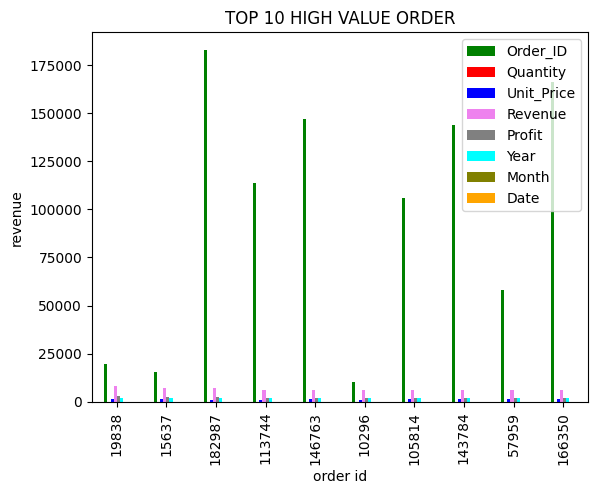

In [414]:
plt.figure(figsize=(12,6))
colors=["green","red","blue","violet","grey","cyan","olive","orange"]
top_10_orders_by_profit.plot(kind="bar",color=colors)
plt.title("TOP 10 HIGH VALUE ORDER")
plt.xlabel("order id")
plt.ylabel("revenue")
plt.show()